In [219]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipykernel import kernelapp as app
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib inline
import jellyfish

In [220]:
df = pd.read_csv("C:\GIT\Amlin\clean_data3.csv", dtype={'Month': str})

In [221]:
dropped = [' British Columbia', ' Bronx', ' Brooklyn', ' London', ' Noord Holland', " O'ahu", ' Quebec', ' Puerto Rico', 'nan', '0']

In [222]:
df['State'].fillna('0')

0                    Kentucky
1                   Tennessee
2                     Florida
3                    New York
4                    Colorado
5                    Kentucky
6                       Texas
7                  California
8                     Wyoming
9                     Florida
10                   Colorado
11                   Kentucky
12                    Florida
13              Massachusetts
14                   Kentucky
15                   Michigan
16       District Of Columbia
17                     Hawaii
18                       Utah
19                      Texas
20                       Utah
21                   Illinois
22                    Florida
23                   Michigan
24                   New York
25                    Florida
26                 California
27                       Iowa
28                   Virginia
29                      Maine
                ...          
5250            New Hampshire
5251                        0
5252      

In [223]:
df = df[~df.State.isin(dropped)]

In [224]:
len(df.State.unique())

52

In [227]:
#df.to_csv('C:\GIT\Amlin\Final_data.csv', index=False)

In [141]:
from sklearn import preprocessing

for f in df.columns:
    if df[f].dtype == 'object':
        print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[f].values))
        df[f] = lbl.transform(list(df[f].values))

Month
Company
City
State
Type of breach
Type of organization
Records Breached
Description of incident


In [142]:
df.head()

,Day,Month,Year,Company,City,State,Type of breach,Type of organization,Records Breached,Total Records,Description of incident
0,21,10,2009,622,1230,17,1,3,1636,676,305
1,21,10,2009,3406,534,42,5,3,393,14783,3925
2,15,10,2009,1748,321,9,5,5,1044,33000,1207
3,4,10,2009,3832,1219,32,1,3,965,300,4185
4,28,11,2009,3151,261,5,4,5,521,175,3484


In [214]:
df1 = df[['Month']]
df1['Count'] = 1
df1 = df1.groupby(['Month']).sum()
df1

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Count
Month,
0,446
1,438
2,457
3,419
4,460
5,451
6,419
7,481
8,460


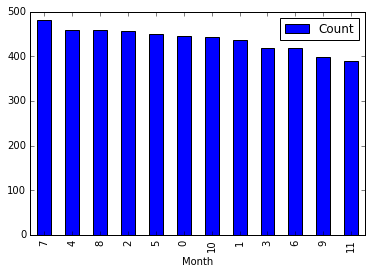

In [217]:
df1.sort_values('Count', ascending=False).plot(kind='bar')